In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [3]:
df_month = pd.read_csv("spearman_corr.csv")
df_month

,November_4,May_4,June_5,May_9,May_10,May_3,June_4,August_3,April_5,May_5,...,March,November_6,May_12,May_11,August_4,June_3,April_9,September_2,August_5,November
0,0.092858,0.065741,-0.507901,-0.676793,-0.337310,0.033686,0.111761,-0.032209,-0.570061,0.488072,...,0.035974,0.963825,-0.214092,-0.316977,-0.758994,0.230843,0.452433,-0.390002,-0.452718,-0.990305
1,0.092858,0.061658,-0.507901,-0.213397,-0.290004,-0.016299,0.111761,-0.032209,-0.610055,0.147322,...,0.101229,0.963825,-0.119266,-0.567900,-0.758994,0.230843,0.623136,-0.390002,-0.452718,-0.990305
2,-0.144591,0.022404,-0.343425,0.376218,-0.085953,-0.463674,0.628831,0.406843,-0.464105,-0.057964,...,0.557416,0.701241,-0.235339,-0.911579,-0.474567,0.501630,0.580641,-0.159893,-0.035065,-0.395906
3,0.211338,0.277889,-0.256383,-0.143403,-0.161828,-0.300338,0.361572,-0.042078,-0.464851,-0.219012,...,-0.233336,0.659336,-0.103809,-0.527982,-0.168676,0.377077,0.525450,-0.261131,-0.200713,-0.024762
4,0.227199,0.221217,-0.333727,0.515070,-0.055905,-0.444215,0.131819,0.239601,-0.112498,0.020062,...,0.117730,0.759169,-0.141186,-0.697662,-0.327205,0.365047,0.386678,-0.268855,-0.131263,-0.348631
5,0.489400,0.055913,-0.301398,-0.538951,-0.202906,-0.054209,-0.396615,-0.317078,-0.461749,0.040384,...,0.042740,0.844226,-0.118332,-0.653776,-0.415758,0.859266,0.740051,-0.377147,-0.263126,-0.411006
6,0.126746,0.217356,-0.443026,0.322864,-0.197503,-0.288842,0.469586,0.223348,-0.608293,0.082909,...,0.215333,0.638763,-0.028744,-0.697543,-0.319493,0.169173,0.222575,0.010914,0.328465,-0.432551
7,0.238995,-0.190489,-0.247822,-0.214216,-0.571212,-0.170438,0.179807,-0.472590,0.068665,0.142410,...,0.224397,0.265784,0.000818,-0.525066,-0.141282,0.340634,0.270515,-0.300136,-0.502770,-0.340298
8,0.179015,0.263546,-0.469433,0.160824,-0.407680,-0.436033,0.577831,0.449414,-0.408084,-0.635543,...,-0.130707,0.660742,-0.141889,-1.384778,-0.155456,0.027015,0.732969,-0.007257,0.054681,-0.239027
9,0.141883,-0.104601,-0.512329,-0.016718,-0.403877,-0.333610,0.507636,0.172810,0.042054,0.591505,...,-0.062368,0.686438,-0.227652,-0.709413,-0.177063,0.526172,0.217513,-0.119027,-0.425538,-0.322795


In [4]:
scaler = StandardScaler()

In [5]:
x_train = df_month.iloc[:42, :10]
x_train = scaler.fit_transform(x_train)
x_train

array([[-9.64688492e-01, -3.31905370e-01, -7.81822933e-01,
        -2.44350980e+00,  3.83859397e-01,  6.18174203e-01,
        -1.17632735e+00, -1.62546281e-01, -7.98758908e-01,
         1.40613222e+00],
       [-9.64688492e-01, -3.44249872e-01, -7.81822933e-01,
        -9.50881838e-01,  6.33569553e-01,  3.60214219e-01,
        -1.17632735e+00, -1.62546281e-01, -9.02842518e-01,
         4.70134022e-01],
       [-2.40950299e+00, -4.62928215e-01,  4.30341801e-01,
         9.48306489e-01,  1.71066054e+00, -1.94857237e+00,
         4.58085133e-01,  1.41386063e+00, -5.23006144e-01,
        -9.37631792e-02],
       [-2.43766668e-01,  3.09491841e-01,  1.07182663e+00,
        -7.25425780e-01,  1.31015467e+00, -1.10563495e+00,
        -3.86697005e-01, -1.97979727e-01, -5.24949026e-01,
        -5.36144676e-01],
       [-1.47255028e-01,  1.38150419e-01,  5.01812574e-01,
         1.39555697e+00,  1.86927352e+00, -1.84814799e+00,
        -1.11292408e+00,  8.13384581e-01,  3.92054362e-01,
         1.

In [6]:
y_train = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_tr= df.iloc[:42][i]
    y_train.append(y_tr)
    

In [7]:
y_train

[0     0.0675
 1    -0.3875
 2    -0.1050
 3    -0.2475
 4    -0.3025
 5     0.5975
 6    -0.8050
 7     0.9425
 8     0.0550
 9    -0.2800
 10    0.2200
 11    0.3375
 12   -0.7525
 13   -0.7050
 14    0.9950
 15   -1.1525
 16   -0.5050
 17   -1.2725
 18    0.2575
 19    0.3750
 20   -0.5375
 21    0.1325
 22    0.0100
 23   -0.2075
 24    0.9700
 25   -0.0300
 26   -0.5125
 27   -0.6075
 28    0.2275
 29    1.3975
 30   -1.4425
 31   -0.5175
 32    0.1100
 33    0.4800
 34    0.1275
 35    0.3475
 36    0.3375
 37   -0.2100
 38   -0.2250
 39    1.6975
 40   -0.6925
 41   -0.9025
 Name: avg, dtype: float64,
 0     0.30
 1    -0.33
 2    -0.20
 3     0.10
 4    -0.22
 5     0.12
 6    -0.88
 7     0.45
 8     0.14
 9    -0.12
 10    0.19
 11    0.26
 12   -0.30
 13   -0.78
 14    0.66
 15   -0.86
 16   -0.70
 17   -1.25
 18    0.00
 19    0.36
 20   -0.45
 21    0.04
 22    0.37
 23   -0.15
 24    0.92
 25    0.62
 26   -0.90
 27   -0.76
 28   -0.08
 29    1.24
 30   -1.46
 31   -0.64


In [8]:
x_test = df_month.iloc[43:, :10]
x_test = scaler.fit_transform(x_test)
x_test

array([[-0.13320599,  0.51902901,  0.19748644,  0.07713988, -0.49191253,
        -0.01166501,  1.46580226,  0.32037698, -0.35384492, -1.90886975],
       [ 0.28521327, -1.64900072,  1.19170479, -1.14044717, -1.19844819,
         1.18829611, -1.61489126, -0.4227716 , -0.33915351,  0.51453792],
       [ 0.172075  , -0.25896521, -0.51067382,  0.4086727 ,  0.10774594,
        -0.03826249, -0.86720025,  0.7229087 , -1.6967388 ,  0.31730501],
       [-0.60872528, -1.40187958,  1.15139561, -0.59850366, -1.36799065,
         0.79739778,  0.02806901, -0.4395505 ,  1.27308293,  0.84492393],
       [ 1.63103885,  0.08480577, -0.45563463,  0.33965073,  0.01954931,
        -0.45629377,  0.77947473, -0.54042088,  0.20679276,  0.67338497],
       [-0.22525825,  1.53910041,  0.34610784, -0.6474504 ,  1.49919519,
        -0.27325677,  0.61931511,  0.41454134,  0.3830751 ,  0.87170737],
       [-1.23717723, -0.25674317, -0.75319284, -0.31615794,  1.01598805,
        -0.41595585,  1.93027692,  1.98780111

In [9]:
y_test = []
target_variables = ['avg', 'june', 'july', 'august', 'september']
for i in target_variables:
    y_ts= df.iloc[43:][i] 
    y_test.append(y_ts)

In [10]:
y_test

[43   -0.1125
 44    0.6925
 45    0.0375
 46    0.4700
 47    0.0225
 48    0.2800
 49   -0.5350
 50   -0.2000
 51    0.6200
 52   -1.1000
 53   -0.4750
 54    0.4200
 55   -0.2475
 56    0.2800
 57    1.6800
 58   -0.2825
 Name: avg, dtype: float64,
 43   -0.11
 44    0.68
 45   -0.19
 46    0.14
 47    0.22
 48    0.09
 49   -0.16
 50   -0.44
 51    0.49
 52   -0.62
 53   -0.25
 54    0.14
 55   -0.33
 56    0.48
 57    1.28
 58    0.06
 Name: june, dtype: float64,
 43    0.01
 44    0.57
 45    0.14
 46    0.41
 47   -0.01
 48    0.03
 49   -0.37
 50   -0.04
 51    0.69
 52   -0.89
 53   -0.23
 54    0.44
 55   -0.28
 56    0.13
 57    1.56
 58   -0.25
 Name: july, dtype: float64,
 43   -0.07
 44    0.70
 45    0.05
 46    0.66
 47   -0.04
 48    0.37
 49   -0.57
 50   -0.04
 51    0.62
 52   -1.33
 53   -0.66
 54    0.66
 55   -0.29
 56    0.14
 57    1.87
 58   -0.48
 Name: august, dtype: float64,
 43   -0.28
 44    0.82
 45    0.15
 46    0.67
 47   -0.08
 48    0.63
 49   -1.04

# Bagging Regressor:

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

def perform_grid_search(x_train, y_train, x_test):
    param_grid = {
        'base_estimator__max_depth': range(1, 5),
        'n_estimators': range(1, 51)
    }

    # Create the BaggingRegressor with DecisionTreeRegressor as the base estimator
    bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(bagging_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_max_depth = best_params['base_estimator__max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")

    # Use the best parameters to train a BaggingRegressor and make predictions
    regressor = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(max_depth=best_max_depth),
        n_estimators=best_n_estimators,
        oob_score=True,
        random_state=0)
    
    regressor.fit(x_train, y_train)
    score = regressor.score(x_train, y_train)
    y_pred = regressor.predict(x_test)

    return best_params, best_score, score, y_pred


In [12]:

y_pred_list = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list.append(y_pred)



Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 13}
Best Score: 0.4200923053005414
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 33}
Best Score: 0.30708314925832253
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 25}
Best Score: 0.3639816134222881
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 19}
Best Score: 0.3794309364679646
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 13}
Best Score: 0.4069600096592515


In [13]:
y_pred_list

[array([-0.44229256,  0.76222222,  0.19808532,  0.18909324, -0.2611358 ,
        -0.29996907, -0.210287  , -0.65507629, -0.21673767, -0.65565934,
        -0.46220696, -0.45353232, -0.17327816,  0.34926753,  0.69277244,
        -0.0274729 ]),
 array([-0.11847552,  0.69407499, -0.23648153,  0.16474677, -0.11906369,
        -0.11171945, -0.07295767, -0.63858842,  0.15288633, -0.51587064,
        -0.49116615, -0.43763742, -0.01633392, -0.23445359,  0.64451643,
         0.14901192]),
 array([-0.29062105,  0.68236667, -0.10534632,  0.34733504, -0.21159216,
        -0.33379294, -0.23471441, -0.57964028, -0.22723387, -0.56992687,
        -0.3749    , -0.35917214, -0.22152978,  0.09258694,  0.64707619,
         0.11884952]),
 array([-0.27428301,  1.1079386 ,  0.10930451,  0.56124381, -0.07239006,
        -0.2434879 , -0.21823154, -0.6226147 , -0.30831412, -0.58036321,
        -0.41917234, -0.48481867, -0.1698271 ,  0.55480576,  0.95363158,
         0.39610234]),
 array([-0.54581909,  0.63493629

In [14]:
correlation_list = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list.append(corr_bag_reg_mean[0][1])

In [15]:
correlation_list

[0.7064178129935912,
 0.7833427336613974,
 0.6781594821520202,
 0.5819744882724779,
 0.6826932897972174]

In [16]:
months = ['jjas-mean','june','july','august','september']

In [17]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/10 predictors/spearson/coorelation_plots/bagging_regressor'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+vwind (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)


Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/10 predictors/spearson/coorelation_plots/bagging_regressor


In [18]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/10 predictors/spearson/comparison plots/bagging_regressor'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'slp+vwind Predicted vs Actual 10p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/10 predictors/spearson/comparison plots/bagging_regressor


# Random Forest

In [19]:


def perform_random_forest_grid_search(x_train, y_train, x_test):
    # Define the parameter grid
    param_grid = {
        'n_estimators': range(1, 51),
        'max_depth': range(1, 5),
    }

    # Create the RandomForestRegressor
    random_forest_reg = RandomForestRegressor(random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(random_forest_reg, param_grid, cv=2, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(x_train, y_train)

    # Get the best parameters and the corresponding score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    # Save the best values into separate variables
    best_max_depth = best_params['max_depth']
    best_n_estimators = best_params['n_estimators']

    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}")
    print(f"Best max_depth: {best_max_depth}")
    print(f"Best n_estimators: {best_n_estimators}")

    # Use the best parameters to train a RandomForestRegressor and make predictions
    RF = RandomForestRegressor(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        random_state=0)

    RF.fit(x_train, y_train)
    score = RF.score(x_train, y_train)
    y_pred_rf = RF.predict(x_test)

    return best_params, best_score, score, y_pred_rf


In [20]:

y_pred_list_rf = []

for target_variable in y_train:
    best_params, best_score, model_score, y_pred = perform_grid_search(x_train, target_variable, x_test)
    y_pred_list_rf.append(y_pred)


Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 13}
Best Score: 0.4200923053005414
Best Parameters: {'base_estimator__max_depth': 2, 'n_estimators': 33}
Best Score: 0.30708314925832253
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 25}
Best Score: 0.3639816134222881
Best Parameters: {'base_estimator__max_depth': 4, 'n_estimators': 19}
Best Score: 0.3794309364679646
Best Parameters: {'base_estimator__max_depth': 3, 'n_estimators': 13}
Best Score: 0.4069600096592515


In [21]:
y_pred_list_rf

[array([-0.44229256,  0.76222222,  0.19808532,  0.18909324, -0.2611358 ,
        -0.29996907, -0.210287  , -0.65507629, -0.21673767, -0.65565934,
        -0.46220696, -0.45353232, -0.17327816,  0.34926753,  0.69277244,
        -0.0274729 ]),
 array([-0.11847552,  0.69407499, -0.23648153,  0.16474677, -0.11906369,
        -0.11171945, -0.07295767, -0.63858842,  0.15288633, -0.51587064,
        -0.49116615, -0.43763742, -0.01633392, -0.23445359,  0.64451643,
         0.14901192]),
 array([-0.29062105,  0.68236667, -0.10534632,  0.34733504, -0.21159216,
        -0.33379294, -0.23471441, -0.57964028, -0.22723387, -0.56992687,
        -0.3749    , -0.35917214, -0.22152978,  0.09258694,  0.64707619,
         0.11884952]),
 array([-0.27428301,  1.1079386 ,  0.10930451,  0.56124381, -0.07239006,
        -0.2434879 , -0.21823154, -0.6226147 , -0.30831412, -0.58036321,
        -0.41917234, -0.48481867, -0.1698271 ,  0.55480576,  0.95363158,
         0.39610234]),
 array([-0.54581909,  0.63493629

In [22]:
correlation_list_rf = []
for i in range(5):
    corr_bag_reg_mean = np.corrcoef(y_pred_list[i], y_test[i])
    correlation_list_rf.append(corr_bag_reg_mean[0][1])

In [23]:
correlation_list_rf

[0.7064178129935912,
 0.7833427336613974,
 0.6781594821520202,
 0.5819744882724779,
 0.6826932897972174]

In [24]:
import os

output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/10 predictors/spearson/coorelation_plots/randomforest'

for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=80)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=8)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+vwind (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()

    # Save the plot
    plot_filename = f'10_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)

Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/10 predictors/spearson/coorelation_plots/randomforest


In [25]:
output_directory = '/home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/10 predictors/spearson/comparison plots/randomforest'

for i in range(5):
    plt.plot(df['year'][43:], y_test[i], label='Actual', color='blue', marker='o', linestyle='-')
    plt.plot(df['year'][43:], y_pred_list_rf[i], label='Predicted', color='green', marker='s', linestyle='--', alpha=0.7)

    
    plt.grid(True)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Enso Indices', fontsize=12)
    plt.title(f'slp+vwind Predicted vs Actual 10p {months[i]}', fontsize=14)
    plt.legend(loc='upper left')


    
    plot_filename = f'10p_{months[i]}.png'
    plot_filepath = os.path.join(output_directory, plot_filename)
    plt.savefig(plot_filepath)
    plt.close()  # Close the plot to avoid displaying in the notebook

print("Plots saved in:", output_directory)



Plots saved in: /home/ravi/myfolder/enso_code/enso_code-20240105T103408Z-001/enso_code/slp+vwind/10 predictors/spearson/comparison plots/randomforest


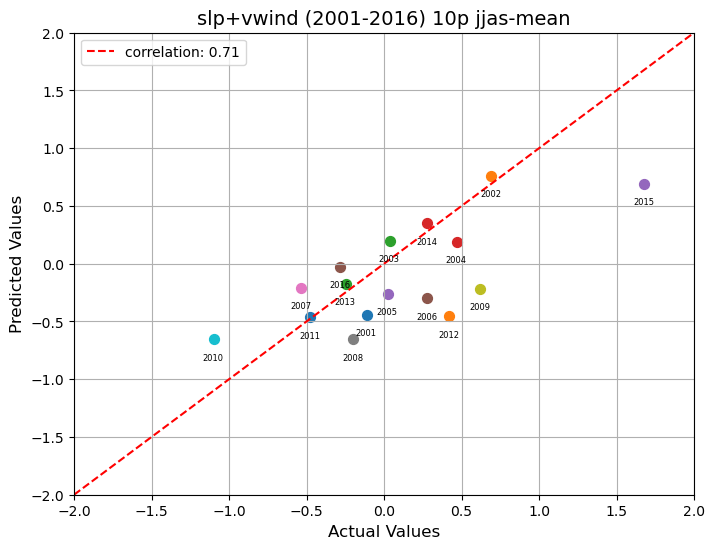

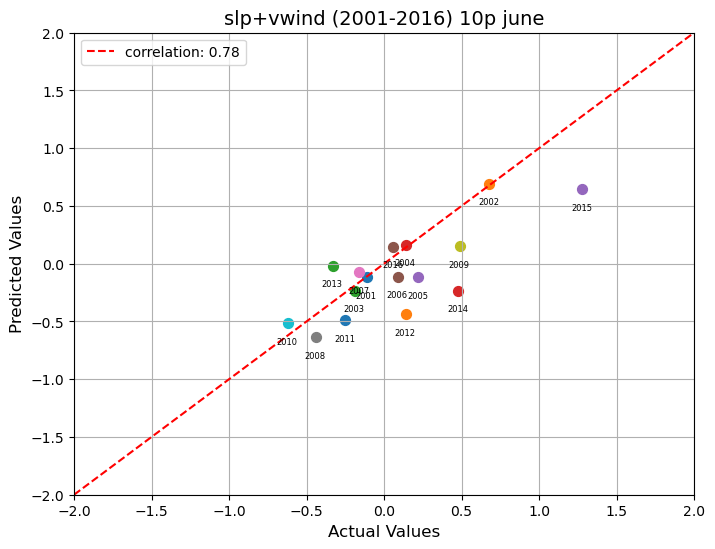

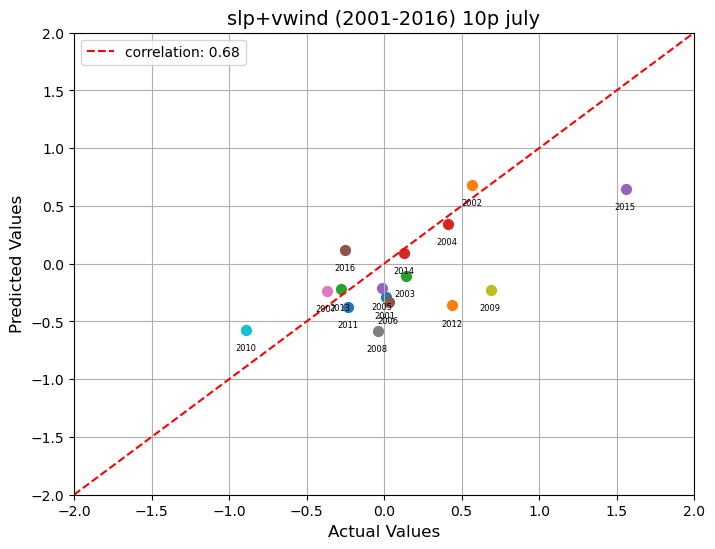

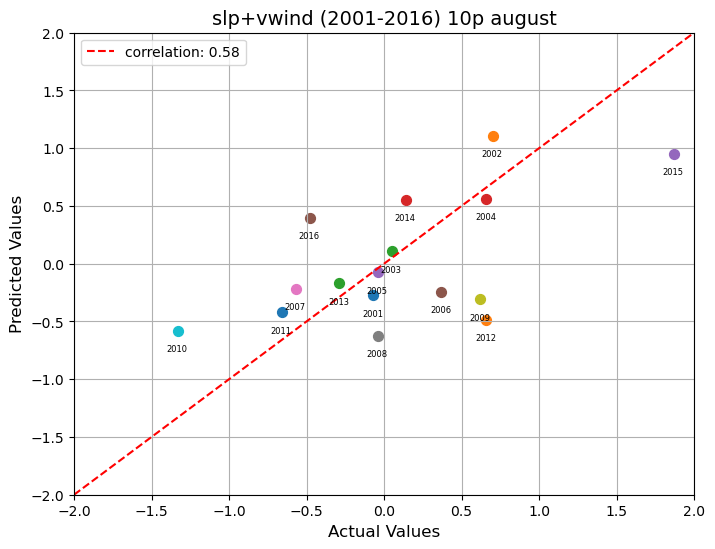

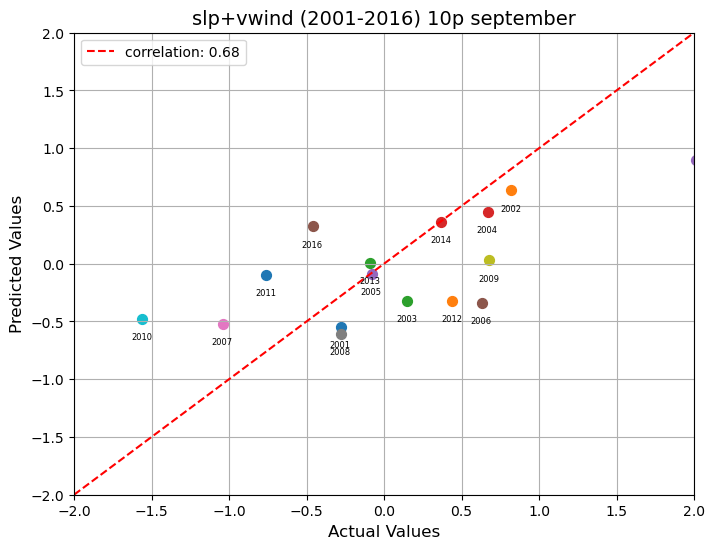

In [26]:
for i in range(5):
    actual_values = y_test[i] # Replace with your actual values
    predicted_values = y_pred_list_rf[i] # Replace with your predicted values
    years = range(2001, 2017)  # Adjust as needed

    plt.figure(figsize=(8, 6))

    # Create scatter plot and annotations
    for year, actual, predicted in zip(years, actual_values, predicted_values):
        plt.scatter(actual, predicted, s=50)
        plt.annotate(f"{year}", (actual, predicted), xytext=(-8, -15), textcoords='offset points',fontsize=6)

    # Add diagonal line and plot elements
    plt.plot([-2, 2], [-2, 2], color='red', linestyle='--', label=f'correlation: {correlation_list[i]:.2f}')
    plt.xlabel('Actual Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.title(f'slp+vwind (2001-2016) 10p {months[i]}', fontsize=14)  # Updated this line
    plt.xlim(-2, 2)  # Set limits from -2 to 2
    plt.ylim(-2, 2)
    plt.grid(True)
    plt.legend()
    plt.show